# Hough Lines Lab

## Required

Create you own playaround to explore houghlines

## Criteria

- Use any edge detection filter you need but `canny` is recommended.
- You must use `houghLinesP` funstion.
- Create a trackbar for each variable in the function.
- Find the suitable parametrs to apply on:
  - Building.jpg
  - Road.jpg
- Save you results as images with lines drawn.

## Grade

10

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image1 = cv2.imread('Building.jpg')
gray1 = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)

image2 = cv2.imread('Road.jpg')
gray2 = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)

## Image (1)

In [30]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray1,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 150
min_line_length = 10
max_line_gap = 7
line_image = np.copy(image1)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [31]:
lines[0]

array([[251, 221, 534, 597]], dtype=int32)

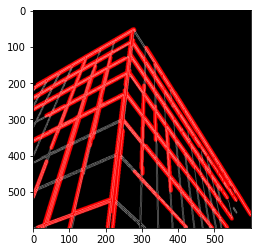

In [32]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

## After Several Trials

### 1- threshold = 150
### 2- min_line_length = 10
### 3- max_line_gap = 7

In [28]:
def nothing(x):
    pass
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray2 = cv2.GaussianBlur(gray2,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray2, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image2)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
cv2.namedWindow('Hough',cv2.WINDOW_NORMAL)

cv2.createTrackbar('threshold', 'Hough', 0, 300, nothing)
cv2.createTrackbar('min_line_length', 'Hough', 0, 10, nothing)
cv2.createTrackbar('max_line_gap', 'Hough', 0, 10, nothing)


while 1:
    image1_copy = image1.copy()
    gray1 = cv2.cvtColor(image1_copy,cv2.COLOR_RGB2GRAY)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray1,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1
    theta = np.pi/180
    threshold = cv2.getTrackbarPos('threshold','Hough')
    min_line_length = cv2.getTrackbarPos('min_line_length','Hough')
    max_line_gap = cv2.getTrackbarPos('max_line_gap','Hough')
    line_image = np.copy(image1_copy)*0 #creating a blank to draw lines on

    # Run Hough on edge detected image
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

    # Draw the lines on the edge image
    combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
    cv2.imshow('Hough', combo)
    k = cv2.waitKey(1)
    if k == ord('q'):
        break

cv2.destroyAllWindows()

## Image(2) 

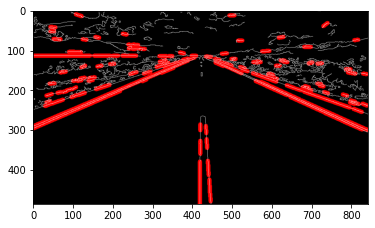

In [29]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray2 = cv2.GaussianBlur(gray2,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray2, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image2)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

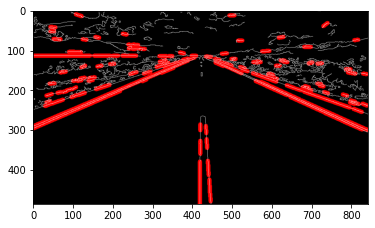

In [35]:
def nothing(x):
    pass
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray2 = cv2.GaussianBlur(gray2,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray2, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image2)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
cv2.namedWindow('Hough',cv2.WINDOW_NORMAL)

cv2.createTrackbar('threshold', 'Hough', 0, 300, nothing)
cv2.createTrackbar('min_line_length', 'Hough', 0, 10, nothing)
cv2.createTrackbar('max_line_gap', 'Hough', 0, 10, nothing)


while 1:
    image2_copy = image2.copy()
    gray1 = cv2.cvtColor(image2_copy,cv2.COLOR_RGB2GRAY)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray1,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1
    theta = np.pi/180
    threshold = cv2.getTrackbarPos('threshold','Hough')
    min_line_length = cv2.getTrackbarPos('min_line_length','Hough')
    max_line_gap = cv2.getTrackbarPos('max_line_gap','Hough')
    line_image = np.copy(image2_copy)*0 #creating a blank to draw lines on

    # Run Hough on edge detected image
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

    # Draw the lines on the edge image
    combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
    cv2.imshow('Hough', combo)
    k = cv2.waitKey(1)
    if k == ord('q'):
        break

cv2.destroyAllWindows()

## After Several Trials

### 1- threshold = 177
### 2- min_line_length = 6
### 3- max_line_gap = 4

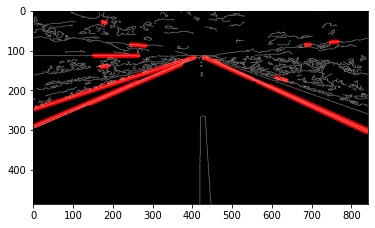

In [34]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray2 = cv2.GaussianBlur(gray2,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray2, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 177
min_line_length = 6
max_line_gap = 4
line_image = np.copy(image2)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)